# Загрузка Pandas и очистка данных

In [1]:
#pip install textblob
from datetime import datetime, date, time
import time
import numpy as np
import pandas as pd
import random as rand
import re
from ast import literal_eval
import textblob
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [4]:
df_train = pd.read_csv(r'd:\sys\Users\akbear\skillfactory\Project03\main_task.csv')
df_test = pd.read_csv(r'd:\sys\Users\akbear\skillfactory\Project03\kaggle_task.csv')
sample_submission = pd.read_csv(r'd:\sys\Users\akbear\skillfactory\Project03\sample_submission.csv')

In [5]:
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

df = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [6]:
display(df.head(10))
df.info()

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0
5,id_5,Paris,"['French', 'Cafe', 'Fast Food']",5093.0,$,24.0,"[['Lunch Break', 'Good to Quick Bite'], ['09/0...",/Restaurant_Review-g187147-d8458643-Reviews-Le...,d8458643,0,0.0
6,id_6,Lisbon,"['European', 'Portuguese']",3704.0,$,2.0,"[[], []]",/Restaurant_Review-g189158-d8758873-Reviews-Li...,d8758873,0,0.0
7,id_7,Budapest,NaN,2330.0,NaN,NaN,"[[], []]",/Restaurant_Review-g274887-d8286886-Reviews-Be...,d8286886,0,0.0
8,id_8,Helsinki,"['European', 'Scandinavian']",771.0,NaN,2.0,"[['Big group supper', 'Good food but very slow...",/Restaurant_Review-g189934-d12947542-Reviews-B...,d12947542,0,0.0
9,id_9,Stockholm,['Italian'],605.0,NaN,13.0,"[['Good food', 'Good pizza'], ['12/02/2017', '...",/Restaurant_Review-g189852-d12716384-Reviews-I...,d12716384,0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [7]:
df.columns

Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Price Range',
       'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating'],
      dtype='object')

In [8]:
#df = df.rename(columns=lambda x: x.lower())
df.rename(columns={'City': 'city', 'Cuisine Style': 'cuisine', 'Ranking': 'ranking', 'Price Range': 'price',
                   'Number of Reviews': 'num_rev', 'Reviews': 'rev', 'URL_TA': 'url' 
                    }, inplace=True)
df.columns

Index(['Restaurant_id', 'city', 'cuisine', 'ranking', 'price', 'num_rev',
       'rev', 'url', 'ID_TA', 'sample', 'Rating'],
      dtype='object')

In [9]:
df.city.isnull().sum()

0

In [10]:
df.city.value_counts()

London        7193
Paris         6108
Madrid        3813
Barcelona     3395
Berlin        2705
Milan         2694
Rome          2589
Prague        1816
Lisbon        1647
Vienna        1443
Amsterdam     1372
Brussels      1314
Hamburg       1186
Munich        1145
Lyon          1126
Stockholm     1033
Budapest      1021
Warsaw         925
Dublin         836
Copenhagen     819
Athens         776
Edinburgh      745
Zurich         685
Oporto         642
Geneva         590
Krakow         554
Oslo           488
Helsinki       475
Bratislava     380
Luxembourg     263
Ljubljana      222
Name: city, dtype: int64

In [11]:
df.cuisine.isnull().sum()

11590

In [12]:
#заполним пропуски по кухням модой по каждому городу

df.cuisine = df.groupby("city")["cuisine"].\
    transform(lambda x: x.fillna(x.mode()[0]))

In [13]:
df_cuisine = df.copy()
df_cuisine.cuisine = df_cuisine.cuisine.str.split(',')
df_cuisine = df_cuisine.explode('cuisine')
df_cuisine.cuisine = df_cuisine.cuisine.str.replace('[', '')
df_cuisine.cuisine = df_cuisine.cuisine.str.replace(']', '')
df_cuisine.cuisine = df_cuisine.cuisine.str.replace(' ', '')
df_cuisine.cuisine.value_counts().head(30)

<ipython-input-13-74b8d3a948a8>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_cuisine.cuisine = df_cuisine.cuisine.str.replace('[', '')
<ipython-input-13-74b8d3a948a8>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_cuisine.cuisine = df_cuisine.cuisine.str.replace(']', '')


'European'              15736
'VegetarianFriendly'    14021
'Italian'               10221
'Mediterranean'          7936
'French'                 5814
'VeganOptions'           5684
'Bar'                    5538
'Spanish'                5422
'GlutenFreeOptions'      5185
'Pub'                    4746
'Asian'                  3786
'Pizza'                  3502
'British'                3202
'Cafe'                   2979
'FastFood'               2122
'International'          1966
'Portuguese'             1934
'Seafood'                1878
'Japanese'               1860
'CentralEuropean'        1727
'American'               1642
'Sushi'                  1450
'Chinese'                1446
'Indian'                 1328
'Czech'                  1052
'MiddleEastern'           980
'Thai'                    923
'Greek'                   917
'WineBar'                 877
'Austrian'                864
Name: cuisine, dtype: int64

In [14]:
df.cuisine = df.cuisine.apply(literal_eval)

In [15]:
df['сuismax'] = df['cuisine'].apply(lambda x: len(x)) #создадим столбец с количеством кухонь в точке

In [16]:
df.ranking.isnull().sum()

0

In [17]:
#проверка города на "столичность"

#cities = []

#for i in df['city']:
#    if i not in cities:
#        cities.append(i)

#capitals = ['Paris','Stockholm','London','Berlin','Vienna','Rome','Madrid','Dublin','Brussels','Bratislava',
#           'Warsaw','Budapest','Copenhagen','Amsterdam','Lisbon','Prague','Oslo','Helsinki','Ljubljana',
#           'Athens','Luxembourg','Edinburgh']

#def capital_resturant(city):
#    if city in capitals:
#        return 1
#    else:
#        return 0

#df['capital'] = df.city.apply(capital_resturant)

#не работает

In [18]:
df.num_rev.isnull().sum()

3200

In [19]:
df.num_rev.value_counts()

2.0       2403
3.0       2042
4.0       1707
5.0       1471
6.0       1258
          ... 
1330.0       1
1169.0       1
2148.0       1
8927.0       1
995.0        1
Name: num_rev, Length: 1573, dtype: int64

In [20]:
#df.num_rev = df.num_rev.fillna(df.num_rev.median()) #заполним пропуски в числе отзывов

#заполним пропуски по отзывам модой по каждому городу

df.num_rev = df.groupby("city")["num_rev"].\
    transform(lambda x: x.fillna(x.mode()[0]))

display(df.head(10))


df.num_rev.isnull().sum()

,Restaurant_id,city,cuisine,ranking,price,num_rev,rev,url,ID_TA,sample,Rating,сuismax
0,id_0,Paris,"[Bar, Pub]",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,2
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,5
2,id_2,Edinburgh,[Vegetarian Friendly],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,1
3,id_3,London,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,5
4,id_4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,6
5,id_5,Paris,"[French, Cafe, Fast Food]",5093.0,$,24.0,"[['Lunch Break', 'Good to Quick Bite'], ['09/0...",/Restaurant_Review-g187147-d8458643-Reviews-Le...,d8458643,0,0.0,3
6,id_6,Lisbon,"[European, Portuguese]",3704.0,$,2.0,"[[], []]",/Restaurant_Review-g189158-d8758873-Reviews-Li...,d8758873,0,0.0,2
7,id_7,Budapest,"[European, Hungarian]",2330.0,NaN,2.0,"[[], []]",/Restaurant_Review-g274887-d8286886-Reviews-Be...,d8286886,0,0.0,2
8,id_8,Helsinki,"[European, Scandinavian]",771.0,NaN,2.0,"[['Big group supper', 'Good food but very slow...",/Restaurant_Review-g189934-d12947542-Reviews-B...,d12947542,0,0.0,2
9,id_9,Stockholm,[Italian],605.0,NaN,13.0,"[['Good food', 'Good pizza'], ['12/02/2017', '...",/Restaurant_Review-g189852-d12716384-Reviews-I...,d12716384,0,0.0,1


0

In [21]:
df.num_rev.value_counts()

2.0       4917
3.0       2728
4.0       1707
5.0       1471
6.0       1258
          ... 
1330.0       1
1169.0       1
2148.0       1
8927.0       1
995.0        1
Name: num_rev, Length: 1573, dtype: int64

In [22]:
df['max_rev'] = df['num_rev'].apply(lambda x: 1 if 80 < x <= 330 else 2 if x > 330 else 0)
#создадим дополнительный столбец для популярных ресторанов

df.max_rev.value_counts()

0    35177
1    10393
2     4430
Name: max_rev, dtype: int64

In [23]:
df['rev'] = df['rev'].apply(lambda x: '' if pd.isna(x) else x)
pattern = re.compile('\'\d+\/\d+\/\d+\'?') #Создаем шаблон для поиска дат в тексте отзывов
df['rev_d'] = df['rev'].apply(pattern.findall)
# Применяем шаблон. Теперь в каждой ячейке 'Reviews Date' находится список, состоящий из элементов,
#относящихся к типу данныx str (или пустой список, если даты не нашлись).
#Каждый элемент каждого списка преобразуем из типа str в тип datetime
df['rev_d'] = df['rev_d'].apply(lambda x: sorted([pd.to_datetime(i).date() for i in x]))

df['rev_d']

0                              []
1        [2017-10-29, 2017-12-05]
2        [2017-12-06, 2017-12-28]
3        [2017-11-22, 2017-12-06]
4        [2018-01-24, 2018-02-08]
                   ...           
49995    [2017-11-12, 2017-12-16]
49996    [2017-12-12, 2017-12-21]
49997    [2008-04-12, 2016-11-03]
49998    [2017-06-18, 2017-07-11]
49999    [2012-07-04, 2016-01-31]
Name: rev_d, Length: 50000, dtype: object

In [24]:
'''Далее, полученные списки дат, распределяем по двум новым столбцам 'date_1', 'date_2'.
Учитывая, что списки разной длины: состоящие из двух элементов, одного элемента и пустые, в списках, где количество элементов меньше 2, недостающие значения будем заменять NaN. Отсюда получаем:
- если в списке два элемента, первый уходит в 'date_1', второй в 'date_2'
- если в списке один элемент, то он уходит в 'date_1', в 'date_2' помещается NaN
- если список пуст в оба столбца помещается NaN'''

def func(row):
    if len(row['rev_d']) == 2:
        return row['rev_d'][0], row['rev_d'][1]
    elif len(row['rev_d']) == 1:
        return row['rev_d'][0], np.nan
    else:
        return np.nan,np.nan

df[['date_1', 'date_2']] = df[['rev_d']].apply(func, axis=1, result_type='expand')
df[['date_1', 'date_2']][:20]

,date_1,date_2
0,NaN,NaN
1,2017-10-29,2017-12-05
2,2017-12-06,2017-12-28
3,2017-11-22,2017-12-06
4,2018-01-24,2018-02-08
5,2017-09-02,2017-09-07
6,NaN,NaN
7,NaN,NaN
8,2017-10-11,2018-01-07
9,2017-10-29,2017-12-02


In [25]:
df['day_space'] = (df['date_2']-df['date_1']).dt.days.fillna(0) #считаем диапазон в днях и заполняем пропуски нулем

df['day_space'].sort_values(ascending=False)

1966     3296.0
17990    3207.0
20997    3137.0
49997    3127.0
18356    3096.0
          ...  
12084       0.0
12087       0.0
34145       0.0
12089       0.0
0           0.0
Name: day_space, Length: 50000, dtype: float64

In [26]:
# добавим столбец, отражающий "свежесть" последних отзывов

df['last_rev'] = (date.today() - df['date_2']).dt.days
df['last_rev'] = df['last_rev'].apply(lambda x: 2 if x < 1380 else 1 if 1380 <= x <= 1540 else 0)

df.last_rev.value_counts()

0    26835
1    22440
2      725
Name: last_rev, dtype: int64

In [27]:
#для обогащения датасета посчитаем средний уровень ranking
mean_rank = df.groupby(['city'])['ranking'].mean()
mean_rank.sort_values(ascending=False)

city
London        8169.707354
Paris         6938.557138
Madrid        4388.516391
Barcelona     3879.422680
Berlin        3255.417745
Milan         3106.027840
Rome          2970.733102
Prague        2086.979626
Lisbon        1867.330298
Vienna        1711.275814
Amsterdam     1591.589650
Brussels      1541.901826
Hamburg       1375.409781
Munich        1370.297817
Lyon          1303.902309
Stockholm     1237.482091
Budapest      1219.061704
Warsaw        1055.193514
Copenhagen     982.147741
Dublin         972.127990
Edinburgh      885.130201
Athens         880.213918
Zurich         794.280292
Oporto         752.034268
Geneva         713.227119
Krakow         616.267148
Helsinki       564.231579
Oslo           552.569672
Bratislava     462.428947
Luxembourg     308.159696
Ljubljana      234.509009
Name: ranking, dtype: float64

In [28]:
# добавим в датасет информацию о площади городов и их населении (точнее о средней плотности распределения точек общественного
# питания и их количества на душу населения). информация взята из википедии.
cities = pd.read_csv(r'd:\sys\Users\akbear\skillfactory\Project03\cities.csv', delimiter=';')
display(cities.head(10))
cities.info()

#как мы видим, среднее параметра ranking прямо пропорционально количеству ресторанов в конкретном городе
# => в модель не включаем.

,city,count,people,area,per_people,per_sqkm,mean_rank,rank_per_count,rank_per_people,rank_per_sq
0,London,5757,8900,1570,0.65,3.67,8169,1.42,0.92,5.20
1,Paris,4897,2200,105,2.23,46.64,6938,1.42,3.15,66.08
2,Madrid,3108,3300,607,0.94,5.12,4388,1.41,1.33,7.23
3,Barcelona,2734,3200,101,0.85,27.07,3879,1.42,1.21,38.41
4,Berlin,2155,3600,890,0.60,2.42,3255,1.51,0.90,3.66
5,Milan,2133,1400,180,1.52,11.85,3106,1.46,2.22,17.26
6,Rome,2078,2900,1280,0.72,1.62,2970,1.43,1.02,2.32
7,Prague,1443,1300,500,1.11,2.89,2086,1.45,1.60,4.17
8,Lisbon,1300,500,100,2.60,13.00,1867,1.44,3.73,18.67
9,Vienna,1166,1900,415,0.61,2.81,1711,1.47,0.90,4.12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             31 non-null     object 
 1   count            31 non-null     int64  
 2   people           31 non-null     int64  
 3   area             31 non-null     int64  
 4   per_people       31 non-null     float64
 5   per_sqkm         31 non-null     float64
 6   mean_rank        31 non-null     int64  
 7   rank_per_count   31 non-null     float64
 8   rank_per_people  31 non-null     float64
 9   rank_per_sq      31 non-null     float64
dtypes: float64(5), int64(4), object(1)
memory usage: 2.5+ KB


In [29]:
big_net = df.Restaurant_id.value_counts()
small_net = df.Restaurant_id.value_counts()
big_net = big_net[big_net > 4].index
small_net = small_net[(small_net > 1) & (small_net <= 4)].index

def func(series, dataset):
    dataset = dataset.set_index('city')
    if series['city'] in dataset.index:
        return dataset.loc[series['city']][['per_people', 'per_sqkm', 'rank_per_people',
                                           'rank_per_sq']].values
    return [0, 0]


df[['per_people', 'per_sqkm', 'rank_per_people','rank_per_sq']] = df[['city']].apply(
    lambda x: func(x, cities), axis=1, result_type='expand')
df['net'] = df['Restaurant_id'].apply(lambda x: 1 if x in small_net else 2 if x in big_net else 0)

display(df[['per_people', 'per_sqkm', 'rank_per_people', 'rank_per_sq', 'net']])
df.net.value_counts()

,per_people,per_sqkm,rank_per_people,rank_per_sq,net
0,2.23,46.64,3.15,66.08,2
1,0.58,1.77,0.87,2.65,2
2,1.19,5.05,1.77,7.50,2
3,0.65,3.67,0.92,5.20,2
4,0.70,0.81,1.07,1.25,2
...,...,...,...,...,...
49995,1.52,11.85,2.22,17.26,2
49996,2.23,46.64,3.15,66.08,1
49997,0.85,4.36,1.29,6.58,2
49998,0.40,1.41,0.59,2.04,2


2    30644
1    15549
0     3807
Name: net, dtype: int64

In [30]:
df.price.isnull().sum()

17361

In [31]:
df.price.replace(('$', '$$ - $$$', '$$$$'), (1, 2, 3), inplace=True) #присвоим ценовым категориям числовое значение

In [32]:
df.price.value_counts()

2.0    23041
1.0     7816
3.0     1782
Name: price, dtype: int64

In [33]:
#df.price = df.groupby("Restaurant_id")["price"].\
#    transform(lambda x: x.fillna(round(x.median(),0)))
#df.price.value_counts()

#удивительно, но попытка заполнить очевидно более правдоподобным значением среднего по сети обычно ухудшает итоговую оценку!

In [34]:
#def func(val):
#    if np.isnan(val):
#        return rand.randint(1, 3)
#    else:
#        return val
# заполним пропуски случайным числом    
#df.price = df.price.apply(func)

#или так
#df.price = df.price.apply(lambda x: rand.randint(1,3) if pd.isna(x) else x)

df.price = df.price.fillna(2.0)

df.price.value_counts()

2.0    40402
1.0     7816
3.0     1782
Name: price, dtype: int64

In [35]:
#обработаем отзывы 
def analys(x):
    analysisPol = TextBlob(str(x)).polarity
    analysisSub = TextBlob(str(x)).subjectivity
    return  [analysisPol, analysisSub]
df[['polarity','subjectivity']] = df[['rev']].apply(analys, axis=1, result_type='expand')

<AxesSubplot:>

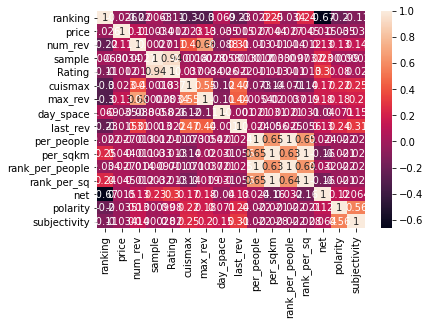

In [36]:
sns.heatmap(df.corr(), annot=True)

In [37]:
#columns = ['Rating']
#cuis = pd.DataFrame(df, columns = columns)

#cuis['Vegetarian'] = df.cuisine.apply(lambda x: 1 if 'Vegetarian' in str(x) else 0)
#cuis['European'] = df.cuisine.apply(lambda x: 1 if 'European' in str(x) else 0)
#cuis['Mediterranean'] = df.cuisine.apply(lambda x: 1 if 'Mediterranean' in str(x) else 0)
#cuis['Italian'] = df.cuisine.apply(lambda x: 1 if 'Italian' in str(x) else 0)
#cuis['Vegan'] = df.cuisine.apply(lambda x: 1 if 'Vegan' in str(x) else 0)
#cuis['Gluten'] = df.cuisine.apply(lambda x: 1 if 'Gluten' in str(x) else 0)
#cuis['Bar'] = df.cuisine.apply(lambda x: 1 if 'Bar' in str(x) else 0)
#cuis['French'] = df.cuisine.apply(lambda x: 1 if 'French' in str(x) else 0)
#cuis['Asian'] = df.cuisine.apply(lambda x: 1 if 'Asian' in str(x) else 0)
#cuis['Pizza'] = df.cuisine.apply(lambda x: 1 if 'Pizza' in str(x) else 0)
#cus['Spanish'] = df.cuisine.apply(lambda x: 1 if 'Spanish' in str(x) else 0)
#cuis['Pub'] = df.cuisine.apply(lambda x: 1 if 'Pub' in str(x) else 0)
#cuis['Cafe'] = df.cuisine.apply(lambda x: 1 if 'Cafe' in str(x) else 0)
#cuis['FastFood'] = df.cuisine.apply(lambda x: 1 if 'FastFood' in str(x) else 0)
#cuis['British'] = df.cuisine.apply(lambda x: 1 if 'British' in str(x) else 0)
##cus['International'] = df.cuisine.apply(lambda x: 1 if 'International' in str(x) else 0)
#cuis['Japanese'] = df.cuisine.apply(lambda x: 1 if 'Japanese' in str(x) else 0)
##cus['Seafood'] = df.cuisine.apply(lambda x: 1 if 'Seafood' in str(x) else 0)
##cus['Portuguese'] = df.cuisine.apply(lambda x: 1 if 'Portuguese' in str(x) else 0)
#cus['American'] = df.cuisine.apply(lambda x: 1 if 'American' in str(x) else 0)
#cuis['Sushi'] = df.cuisine.apply(lambda x: 1 if 'Sushi' in str(x) else 0)
#cus['Chinese'] = df.cuisine.apply(lambda x: 1 if 'Chinese' in str(x) else 0)
#cus['WineBar'] = df.cuisine.apply(lambda x: 1 if 'WineBar' in str(x) else 0)

#cus.info()

In [38]:
#cuis = cuis.drop(['Rating'], axis = 1)

In [39]:
cuis = pd.get_dummies(df.cuisine.apply(pd.Series).stack()).sum(level=0)
cuis.info()
df = pd.concat([df, cuis], sort = False, axis = 1)
#на ошибке сказывается хуже, чем ручной способ на несколько колонок

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Columns: 125 entries, Afghani to Yunnan
dtypes: uint8(125)
memory usage: 6.3 MB


In [40]:
df = pd.get_dummies(df, columns=[ 'city'], dummy_na=True)

#df['cuisine'].fillna("['European']", inplace=True)
#df_output['Cuisine Style'] = df_output['Cuisine Style'].apply(lambda x: str(x)[1:-1])
#df_output['Cuisine Style'] = df_output['Cuisine Style'].apply(lambda x: x.replace("'", ""))
#cuisines = df['cuisine'].str.get_dummies(sep=',').add_prefix('Cuis_')
#df = df.join(cuisine)

#df.head(5)

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [41]:
df.columns

Index(['Restaurant_id', 'cuisine', 'ranking', 'price', 'num_rev', 'rev', 'url',
       'ID_TA', 'sample', 'Rating',
       ...
       'city_Oporto', 'city_Oslo', 'city_Paris', 'city_Prague', 'city_Rome',
       'city_Stockholm', 'city_Vienna', 'city_Warsaw', 'city_Zurich',
       'city_nan'],
      dtype='object', length=181)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 181 entries, Restaurant_id to city_nan
dtypes: float64(11), int64(5), object(8), uint8(157)
memory usage: 16.6+ MB


In [43]:
#сбрасываем колонки с типом object
#object_columns = [s for s in df.columns if df[s].dtypes == 'object']
#df = df.drop(object_columns, axis = 1, inplace=True)

#очень понравилось это универсальное решение, однако отчего-то тут не работает.

In [44]:
df = df.drop(['Restaurant_id', 'cuisine', 'rev', 'rev_d', 'date_1', 'date_2', 'url', 'ID_TA', 'subjectivity'        
             ], axis = 1)

In [45]:
# Теперь выделим тестовую часть
train_data = df.query('sample == 1').drop(['sample'], axis=1)
test_data = df.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

X.head(25)
#X.info()

,ranking,price,num_rev,сuismax,max_rev,day_space,last_rev,per_people,per_sqkm,rank_per_people,...,city_Oporto,city_Oslo,city_Paris,city_Prague,city_Rome,city_Stockholm,city_Vienna,city_Warsaw,city_Zurich,city_nan
10000,5570.0,2.0,194.0,3,1,41.0,1,2.23,46.64,3.15,...,0,0,1,0,0,0,0,0,0,0
10001,1537.0,2.0,10.0,2,0,382.0,0,0.85,4.36,1.29,...,0,0,0,0,0,1,0,0,0,0
10002,353.0,3.0,688.0,7,2,2.0,1,0.65,3.67,0.92,...,0,0,0,0,0,0,0,0,0,0
10003,3458.0,2.0,3.0,1,0,0.0,0,0.60,2.42,0.90,...,0,0,0,0,0,0,0,0,0,0
10004,621.0,2.0,84.0,3,1,272.0,1,0.60,2.88,0.91,...,0,0,0,0,0,0,0,0,0,0
10005,1419.0,2.0,2.0,2,0,108.0,1,2.23,12.51,3.27,...,1,0,0,0,0,0,0,0,0,0
10006,1722.0,1.0,50.0,2,0,93.0,1,1.52,11.85,2.22,...,0,0,0,0,0,0,0,0,0,0
10007,826.0,2.0,9.0,1,0,613.0,0,0.70,0.81,1.07,...,0,0,0,0,0,0,0,0,0,0
10008,2692.0,2.0,3.0,2,0,0.0,0,0.61,2.81,0.90,...,0,0,0,0,0,0,1,0,0,0
10009,4210.0,1.0,55.0,3,0,225.0,1,0.72,1.62,1.02,...,0,0,0,0,1,0,0,0,0,0


In [46]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [47]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [48]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 171), (40000, 171), (40000, 170), (32000, 170), (8000, 170))

# Создаём, обучаем и тестируем модель

In [49]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [50]:
# Создаём модель
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


In [51]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.211215625


<AxesSubplot:>

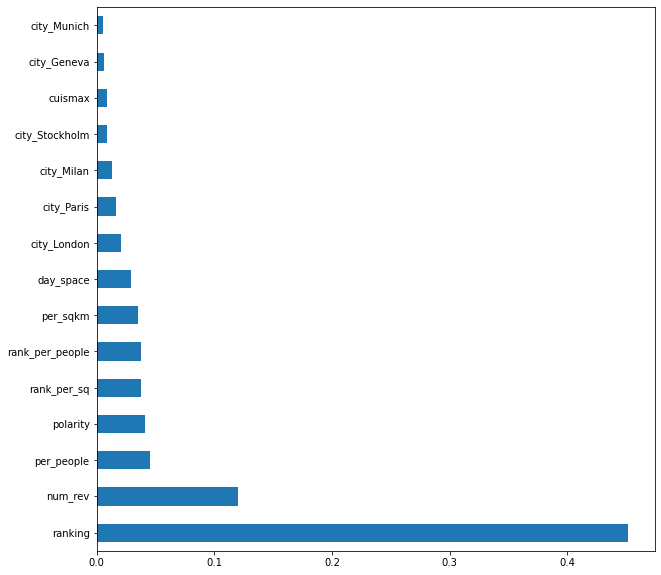

In [52]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [53]:
test_data = test_data.drop(['Rating'], axis=1)

In [54]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [55]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


In [56]:
predict_submission

array([3.05 , 4.275, 4.445, ..., 3.   , 4.5  , 4.29 ])

In [57]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.050
1,id_1,4.275
2,id_2,4.445
3,id_3,4.300
4,id_4,4.435
5,id_5,4.345
6,id_6,1.605
7,id_7,2.710
8,id_8,4.210
9,id_9,4.590
